In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%config InlineBackend.figure_format='retina'

In [2]:
dir_cat = './'
df = pd.read_csv(dir_cat+'gz2_predictions.csv')

In [3]:
df_vTrT = df[df.vitTresT == 1]
df_vTrF = df[df.vitTresF == 1]
df_vFrT = df[df.vitFresT == 1]
df_vFrF = df[df.vitFresF == 1]

print(f'Number of galaxies in test set  : {len(df)}\n')
print(f'ViT True , resnet True  galaxies: {len(df_vTrT)}')
print(f'ViT True , resnet False galaxies: {len(df_vTrF)}')
print(f'ViT False, resnet True  galaxies: {len(df_vFrT)}')
print(f'ViT False, resnet False galaxies: {len(df_vFrF)}')

df.head()

Number of galaxies in test set  : 31191

ViT True , resnet True  galaxies: 24009
ViT True , resnet False galaxies: 1116
ViT False, resnet True  galaxies: 2683
ViT False, resnet False galaxies: 3383


,GalaxyID,class,pred_vit,pred_res,vitTresT,vitTresF,vitFresT,vitFresF,dr7objid,dered_u,...,modelMag_g,modelMag_r,modelMag_i,modelMag_z,lnLDeV_r,lnLExp_r,petroR50_r,petroR90_r,dered_g_r,model_g_r
0,17,0,0,0,1,0,0,0,587722981742084303,19.673649,...,17.684530,16.527191,16.059088,15.693376,-116.616010,-2148.49630,3.208182,9.783567,1.127535,1.157339
1,20,1,1,1,1,0,0,0,587722981742215305,18.132294,...,17.020500,16.340689,15.930616,15.669191,-15.639699,-1587.02050,2.254702,6.496093,0.649712,0.679811
2,24,3,3,3,1,0,0,0,587722981743067266,19.062454,...,17.607351,16.784702,16.297028,15.943096,-254.417700,-378.97885,2.058299,5.655466,0.794344,0.822649
3,36,5,5,7,0,1,0,0,587722981744115851,20.079730,...,18.312954,17.014105,16.509523,16.134436,-171.511660,-1629.12650,3.177179,9.275770,1.274666,1.298849
4,49,3,3,3,1,0,0,0,587722981745295552,17.256195,...,15.881178,15.132768,14.722395,14.406494,-4681.504400,-1925.91130,9.300726,22.432047,0.723113,0.748410


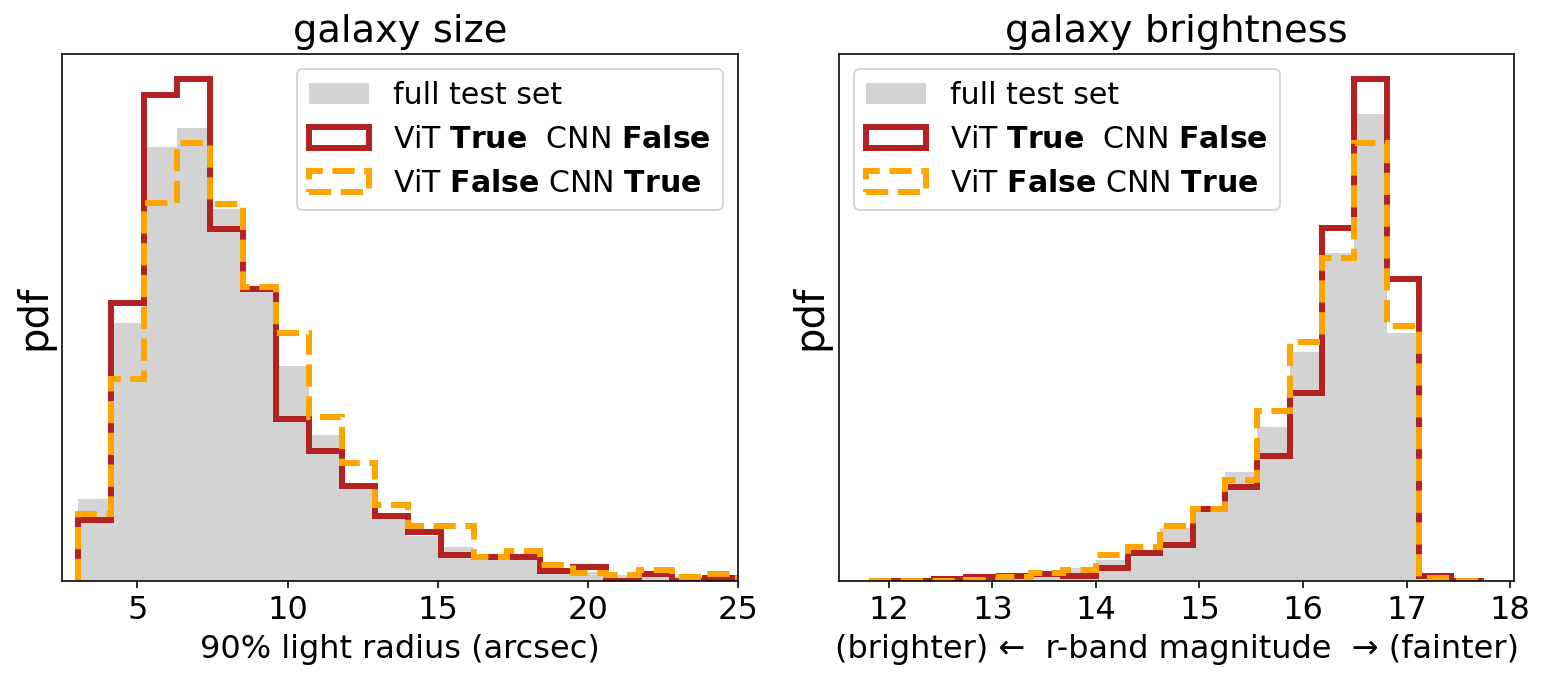

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(11., 5.))
plt.rc('font', size=16)

### Left ###

tag = 'petroR90_r'
bins = np.linspace(df[tag].min(), df[tag].max(),50)

ax[0].hist(df[tag]     , bins=bins, color='lightgray'  , label='full test set', density=True)
#ax[0].hist(df_vTrT[tag], bins=bins, color='royalblue'  , label=r'ViT $\bf{T}$ CNN $\bf{T}$', histtype='step' , lw=2, ls='-.', density=True)
ax[0].hist(df_vTrF[tag], bins=bins, color='firebrick'  , label=r'ViT $\bf{True}$  CNN $\bf{False}$', histtype='step', lw=3, density=True)
ax[0].hist(df_vFrT[tag], bins=bins, color='orange'     , label=r'ViT $\bf{False}$ CNN $\bf{True}$', histtype='step' , lw=3, ls='--', density=True)
#ax[0].hist(df_vFrF[tag], bins=bins, color='forestgreen', label=r'ViT $\bf{F}$ CNN $\bf{F}$', histtype='step', lw=2, ls=':', density=True)

ax[0].set_xlabel('90% light radius (arcsec)')
ax[0].set_title('galaxy size')
ax[0].set_xlim(2.5, 25)

### Right ###

tag = 'dered_r'
bins = np.linspace(df[tag].min(), df[tag].max(),20)

ax[1].hist(df[tag]     , bins=bins, color='lightgray'  , label='full test set', density=True)
#ax[1].hist(df_vTrT[tag], bins=bins, color='royalblue'  , label=r'ViT $\bf{T}$ CNN $\bf{T}$', histtype='step' , lw=2, ls='-.', density=True)
ax[1].hist(df_vTrF[tag], bins=bins, color='firebrick'  , label=r'ViT $\bf{True}$  CNN $\bf{False}$', histtype='step' , lw=3, density=True)
ax[1].hist(df_vFrT[tag], bins=bins, color='orange'     , label=r'ViT $\bf{False}$ CNN $\bf{True}$', histtype='step' , lw=3, ls='--', density=True)
#ax[1].hist(df_vFrF[tag], bins=bins, color='forestgreen', label=r'ViT $\bf{F}$ CNN $\bf{F}$', histtype='step' , lw=2, ls=':', density=True)

ax[1].set_xlabel('(brighter) ←  r-band magnitude  → (fainter)')
ax[1].set_title('galaxy brightness')

#############

for i in range(2):
    ax[i].legend(fontsize=15)
    ax[i].axes.yaxis.set_ticks([])
    ax[i].set_ylabel('pdf', fontsize=20)
    
    
plt.tight_layout()
fig.savefig('ViT_vs_CNN_v1.pdf')

## ------ End ------ 

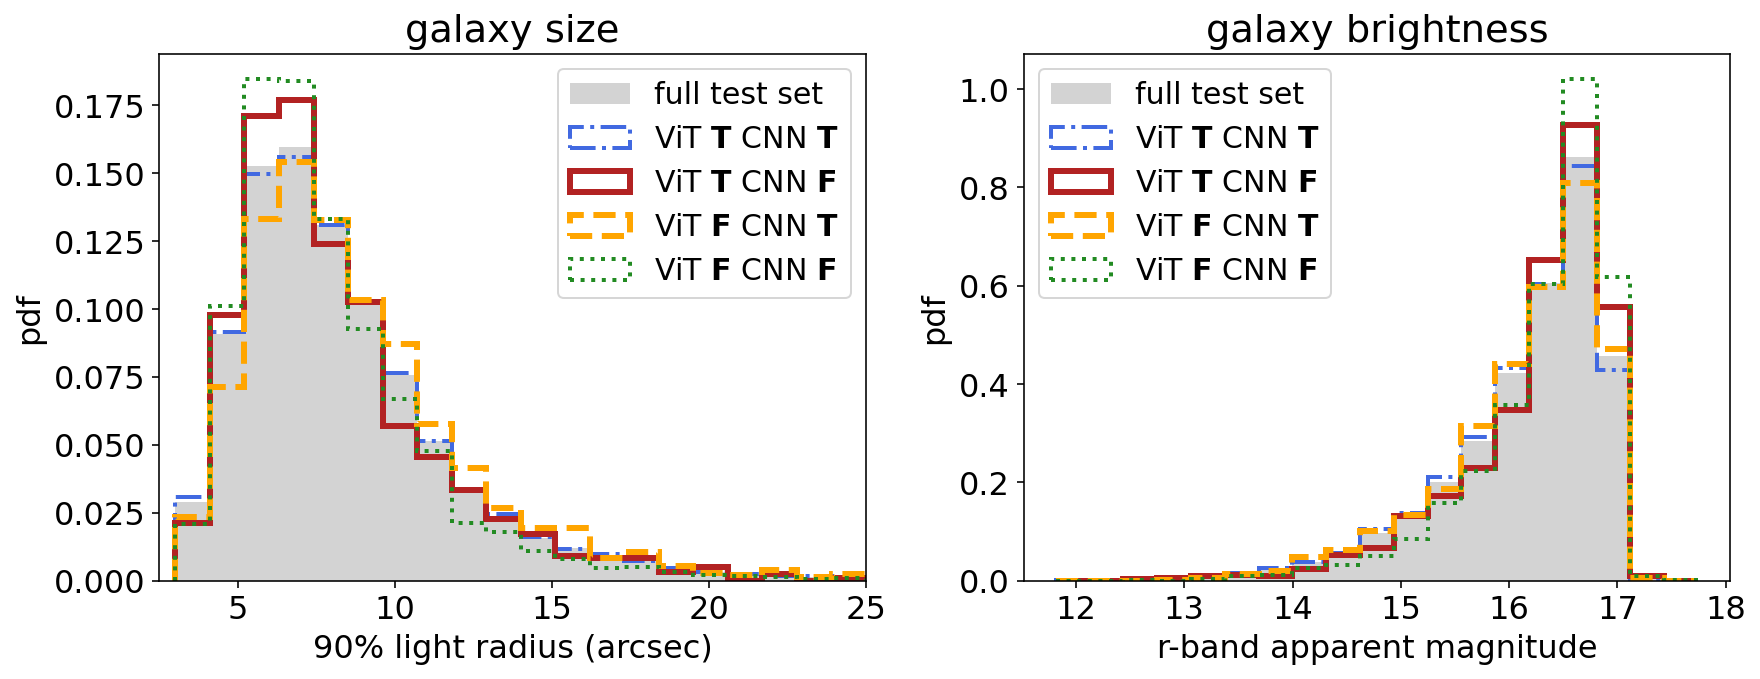

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12.5, 5.))
plt.rc('font', size=16)

### Left ###

tag = 'petroR90_r'
bins = np.linspace(df[tag].min(), df[tag].max(),50)

ax[0].hist(df[tag]     , bins=bins, color='lightgray'  , label='full test set', density=True)
ax[0].hist(df_vTrT[tag], bins=bins, color='royalblue'  , label=r'ViT $\bf{T}$ CNN $\bf{T}$', histtype='step' , lw=2, ls='-.', density=True)
ax[0].hist(df_vTrF[tag], bins=bins, color='firebrick'  , label=r'ViT $\bf{T}$ CNN $\bf{F}$', histtype='step', lw=3, density=True)
ax[0].hist(df_vFrT[tag], bins=bins, color='orange'     , label=r'ViT $\bf{F}$ CNN $\bf{T}$', histtype='step' , lw=3, ls='--', density=True)
ax[0].hist(df_vFrF[tag], bins=bins, color='forestgreen', label=r'ViT $\bf{F}$ CNN $\bf{F}$', histtype='step', lw=2, ls=':', density=True)

ax[0].set_xlabel('90% light radius (arcsec)')
ax[0].set_title('galaxy size')
ax[0].set_xlim(2.5, 25)

### Right ###

tag = 'dered_r'
bins = np.linspace(df[tag].min(), df[tag].max(),20)

ax[1].hist(df[tag]     , bins=bins, color='lightgray'  , label='full test set', density=True)
ax[1].hist(df_vTrT[tag], bins=bins, color='royalblue'  , label=r'ViT $\bf{T}$ CNN $\bf{T}$', histtype='step' , lw=2, ls='-.', density=True)
ax[1].hist(df_vTrF[tag], bins=bins, color='firebrick'  , label=r'ViT $\bf{T}$ CNN $\bf{F}$', histtype='step' , lw=3, density=True)
ax[1].hist(df_vFrT[tag], bins=bins, color='orange'     , label=r'ViT $\bf{F}$ CNN $\bf{T}$', histtype='step' , lw=3, ls='--', density=True)
ax[1].hist(df_vFrF[tag], bins=bins, color='forestgreen', label=r'ViT $\bf{F}$ CNN $\bf{F}$', histtype='step' , lw=2, ls=':', density=True)

ax[1].set_xlabel('r-band apparent magnitude')
ax[1].set_title('galaxy brightness')

#############

for i in range(2):
    ax[i].legend(fontsize=15)
    ax[i].set_ylabel('pdf')

plt.tight_layout()
fig.savefig('ViT_vs_CNN_v2.pdf')

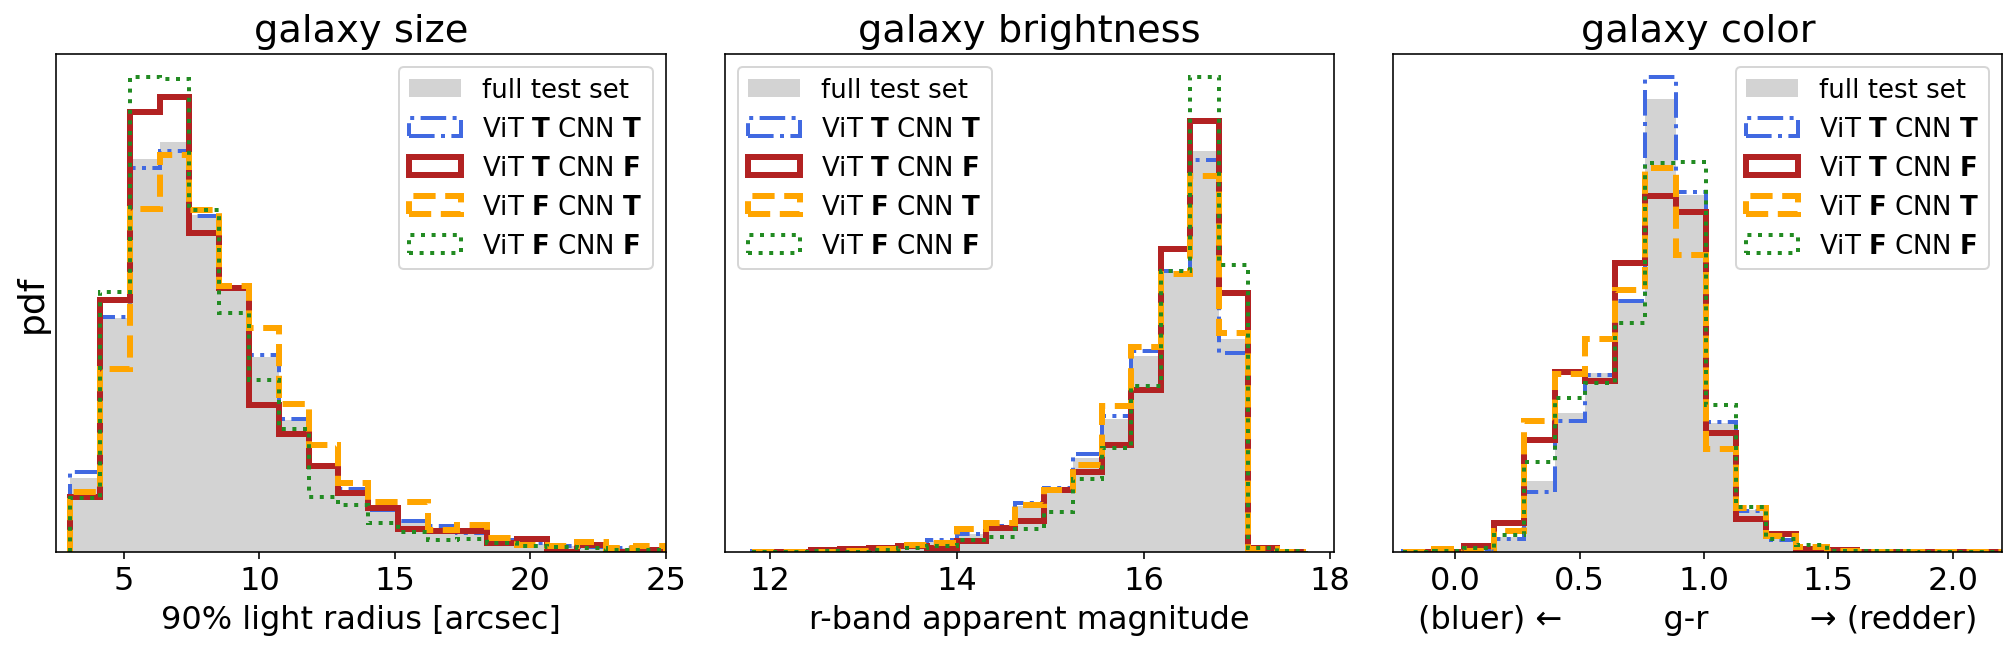

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(14.3, 4.8))
plt.rc('font', size=16)

### Left ###

tag = 'petroR90_r'
bins = np.linspace(df[tag].min(), df[tag].max(),50)

ax[0].hist(df[tag]     , bins=bins, color='lightgray'  , label='full test set', density=True)
ax[0].hist(df_vTrT[tag], bins=bins, color='royalblue'  , label=r'ViT $\bf{T}$ CNN $\bf{T}$', histtype='step' , lw=2, ls='-.', density=True)
ax[0].hist(df_vTrF[tag], bins=bins, color='firebrick'  , label=r'ViT $\bf{T}$ CNN $\bf{F}$', histtype='step', lw=3, density=True)
ax[0].hist(df_vFrT[tag], bins=bins, color='orange'     , label=r'ViT $\bf{F}$ CNN $\bf{T}$', histtype='step' , lw=3, ls='--', density=True)
ax[0].hist(df_vFrF[tag], bins=bins, color='forestgreen', label=r'ViT $\bf{F}$ CNN $\bf{F}$', histtype='step', lw=2, ls=':', density=True)

ax[0].set_xlabel('90% light radius [arcsec]')
ax[0].set_title('galaxy size')
ax[0].set_xlim(2.5, 25)

### Mid ###

tag = 'dered_r'
bins = np.linspace(df[tag].min(), df[tag].max(),20)

ax[1].hist(df[tag]     , bins=bins, color='lightgray'  , label='full test set', density=True)
ax[1].hist(df_vTrT[tag], bins=bins, color='royalblue'  , label=r'ViT $\bf{T}$ CNN $\bf{T}$', histtype='step' , lw=2, ls='-.', density=True)
ax[1].hist(df_vTrF[tag], bins=bins, color='firebrick'  , label=r'ViT $\bf{T}$ CNN $\bf{F}$', histtype='step' , lw=3, density=True)
ax[1].hist(df_vFrT[tag], bins=bins, color='orange'     , label=r'ViT $\bf{F}$ CNN $\bf{T}$', histtype='step' , lw=3, ls='--', density=True)
ax[1].hist(df_vFrF[tag], bins=bins, color='forestgreen', label=r'ViT $\bf{F}$ CNN $\bf{F}$', histtype='step' , lw=2, ls=':', density=True)

ax[1].set_xlabel('r-band apparent magnitude')
ax[1].set_title('galaxy brightness')

### Right ###

tag = 'dered_g_r'
bins = np.linspace(df[tag].min(), df[tag].max(),80)

ax[2].hist(df[tag]     , bins=bins, color='lightgray'  , label='full test set', density=True)
ax[2].hist(df_vTrT[tag], bins=bins, color='royalblue'  , label=r'ViT $\bf{T}$ CNN $\bf{T}$', histtype='step' , lw=2, ls='-.', density=True)
ax[2].hist(df_vTrF[tag], bins=bins, color='firebrick'  , label=r'ViT $\bf{T}$ CNN $\bf{F}$', histtype='step', lw=3, density=True)
ax[2].hist(df_vFrT[tag], bins=bins, color='orange'     , label=r'ViT $\bf{F}$ CNN $\bf{T}$', histtype='step' , lw=3, ls='--', density=True)
ax[2].hist(df_vFrF[tag], bins=bins, color='forestgreen', label=r'ViT $\bf{F}$ CNN $\bf{F}$', histtype='step', lw=2, ls=':', density=True)

ax[2].set_xlabel('(bluer) ←          g-r          → (redder)')
ax[2].set_xlim(-0.25, 2.2)
ax[2].set_title('galaxy color')

#############

for i in range(3):
    ax[i].legend(fontsize=13)
    ax[i].axes.yaxis.set_ticks([])

ax[0].set_ylabel('pdf', fontsize=18)

plt.tight_layout()
fig.savefig('ViT_vs_CNN_v3.pdf')

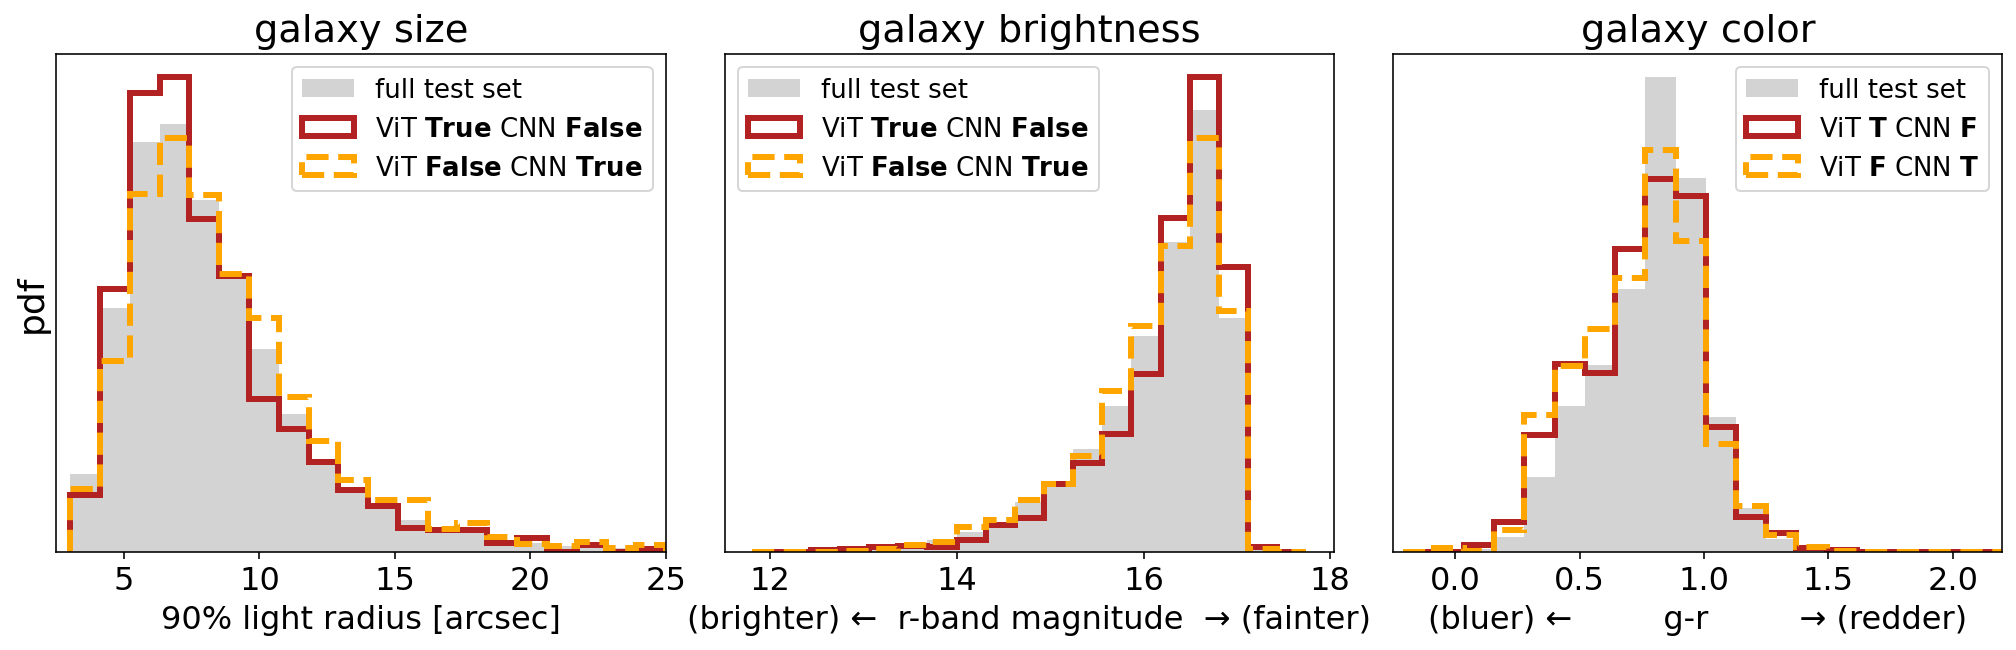

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(14.3, 4.8))
plt.rc('font', size=16)

### Left ###

tag = 'petroR90_r'
bins = np.linspace(df[tag].min(), df[tag].max(),50)

ax[0].hist(df[tag]     , bins=bins, color='lightgray'  , label='full test set', density=True)
#ax[0].hist(df_vTrT[tag], bins=bins, color='royalblue'  , label=r'ViT $\bf{T}$ CNN $\bf{T}$', histtype='step' , lw=2, ls='-.', density=True)
ax[0].hist(df_vTrF[tag], bins=bins, color='firebrick'  , label=r'ViT $\bf{True }$ CNN $\bf{False}$', histtype='step', lw=3, density=True)
ax[0].hist(df_vFrT[tag], bins=bins, color='orange'     , label=r'ViT $\bf{False}$ CNN $\bf{True}$', histtype='step' , lw=3, ls='--', density=True)
#ax[0].hist(df_vFrF[tag], bins=bins, color='forestgreen', label=r'ViT $\bf{F}$ CNN $\bf{F}$', histtype='step', lw=2, ls=':', density=True)

ax[0].set_xlabel('90% light radius [arcsec]')
ax[0].set_title('galaxy size')
ax[0].set_xlim(2.5, 25)

### Mid ###

tag = 'dered_r'
bins = np.linspace(df[tag].min(), df[tag].max(),20)

ax[1].hist(df[tag]     , bins=bins, color='lightgray'  , label='full test set', density=True)
#ax[1].hist(df_vTrT[tag], bins=bins, color='royalblue'  , label=r'ViT $\bf{T}$ CNN $\bf{T}$', histtype='step' , lw=2, ls='-.', density=True)
ax[1].hist(df_vTrF[tag], bins=bins, color='firebrick'  , label=r'ViT $\bf{True }$ CNN $\bf{False}$', histtype='step' , lw=3, density=True)
ax[1].hist(df_vFrT[tag], bins=bins, color='orange'     , label=r'ViT $\bf{False}$ CNN $\bf{True}$', histtype='step' , lw=3, ls='--', density=True)
#ax[1].hist(df_vFrF[tag], bins=bins, color='forestgreen', label=r'ViT $\bf{F}$ CNN $\bf{F}$', histtype='step' , lw=2, ls=':', density=True)

ax[1].set_xlabel('(brighter) ←  r-band magnitude  → (fainter)')
ax[1].set_title('galaxy brightness')

### Right ###

tag = 'dered_g_r'
bins = np.linspace(df[tag].min(), df[tag].max(),80)

ax[2].hist(df[tag]     , bins=bins, color='lightgray'  , label='full test set', density=True)
#ax[2].hist(df_vTrT[tag], bins=bins, color='royalblue'  , label=r'ViT $\bf{T}$ CNN $\bf{T}$', histtype='step' , lw=2, ls='-.', density=True)
#ax[2].hist(df_vTrT[tag], bins=bins, color='royalblue'  , label=r'ViT $\bf{T}$ CNN $\bf{T}$', lw=2, alpha=0.2, density=True)
ax[2].hist(df_vTrF[tag], bins=bins, color='firebrick'  , label=r'ViT $\bf{T}$ CNN $\bf{F}$', histtype='step', lw=3, density=True)
ax[2].hist(df_vFrT[tag], bins=bins, color='orange'     , label=r'ViT $\bf{F}$ CNN $\bf{T}$', histtype='step' , lw=3, ls='--', density=True)
#ax[2].hist(df_vFrF[tag], bins=bins, color='forestgreen', label=r'ViT $\bf{F}$ CNN $\bf{F}$', histtype='step', lw=2, ls=':', density=True)
#ax[2].hist(df_vFrF[tag], bins=bins, color='forestgreen', label=r'ViT $\bf{F}$ CNN $\bf{F}$', lw=2, alpha=0.2, density=True)


ax[2].set_xlabel('(bluer) ←         g-r         → (redder)')
ax[2].set_xlim(-0.25, 2.2)
ax[2].set_title('galaxy color')

#############

for i in range(3):
    ax[i].legend(fontsize=13)
    ax[i].axes.yaxis.set_ticks([])

ax[0].set_ylabel('pdf', fontsize=18)

plt.tight_layout()
fig.savefig('ViT_vs_CNN_v4.pdf')